
# A Machine Learning Approach to Cardiotocography Interpretation
### Authors: Holly Figueroa & Karlie Schwartzwald

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Milestone 3 - Preliminary Analysis

### Questions we need to answer:

* **Will I be able to answer the questions I want to answer with the data I have?**
* **What visualizations are especially useful for explaining my data?**
* **Do I need to adjust the data and/or driving questions?**
* **Do I need to adjust my model/evaluation choices?**
* **Are my original expectations still reasonable?**


## Notes for Karlie:
I notes added to the heat map are not set in stone. One thing I noted, that I am not sure about, is that between the correlated features of histogram mean, median, and mode is that mode has the higheset correlation to our target. I am wondering if that would make it a more favorable variable to keep instead of the mean. I found one resource that suggests the higher correlation to the target the better.  
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjlkPSH08z8AhXJhYkEHYvJC2IQFnoECBkQAw&url=https%3A%2F%2Fdatascience.stackexchange.com%2Fquestions%2F94887%2Fa-feature-highly-correlated-with-target-variable&usg=AOvVaw3hivliGVX328l3jjURoxoE  

I also noted that a threshold will have be chosen and wasn't sure if you had a number in mind we could specify. I have seen examples as high as 95%

<AxesSubplot:>

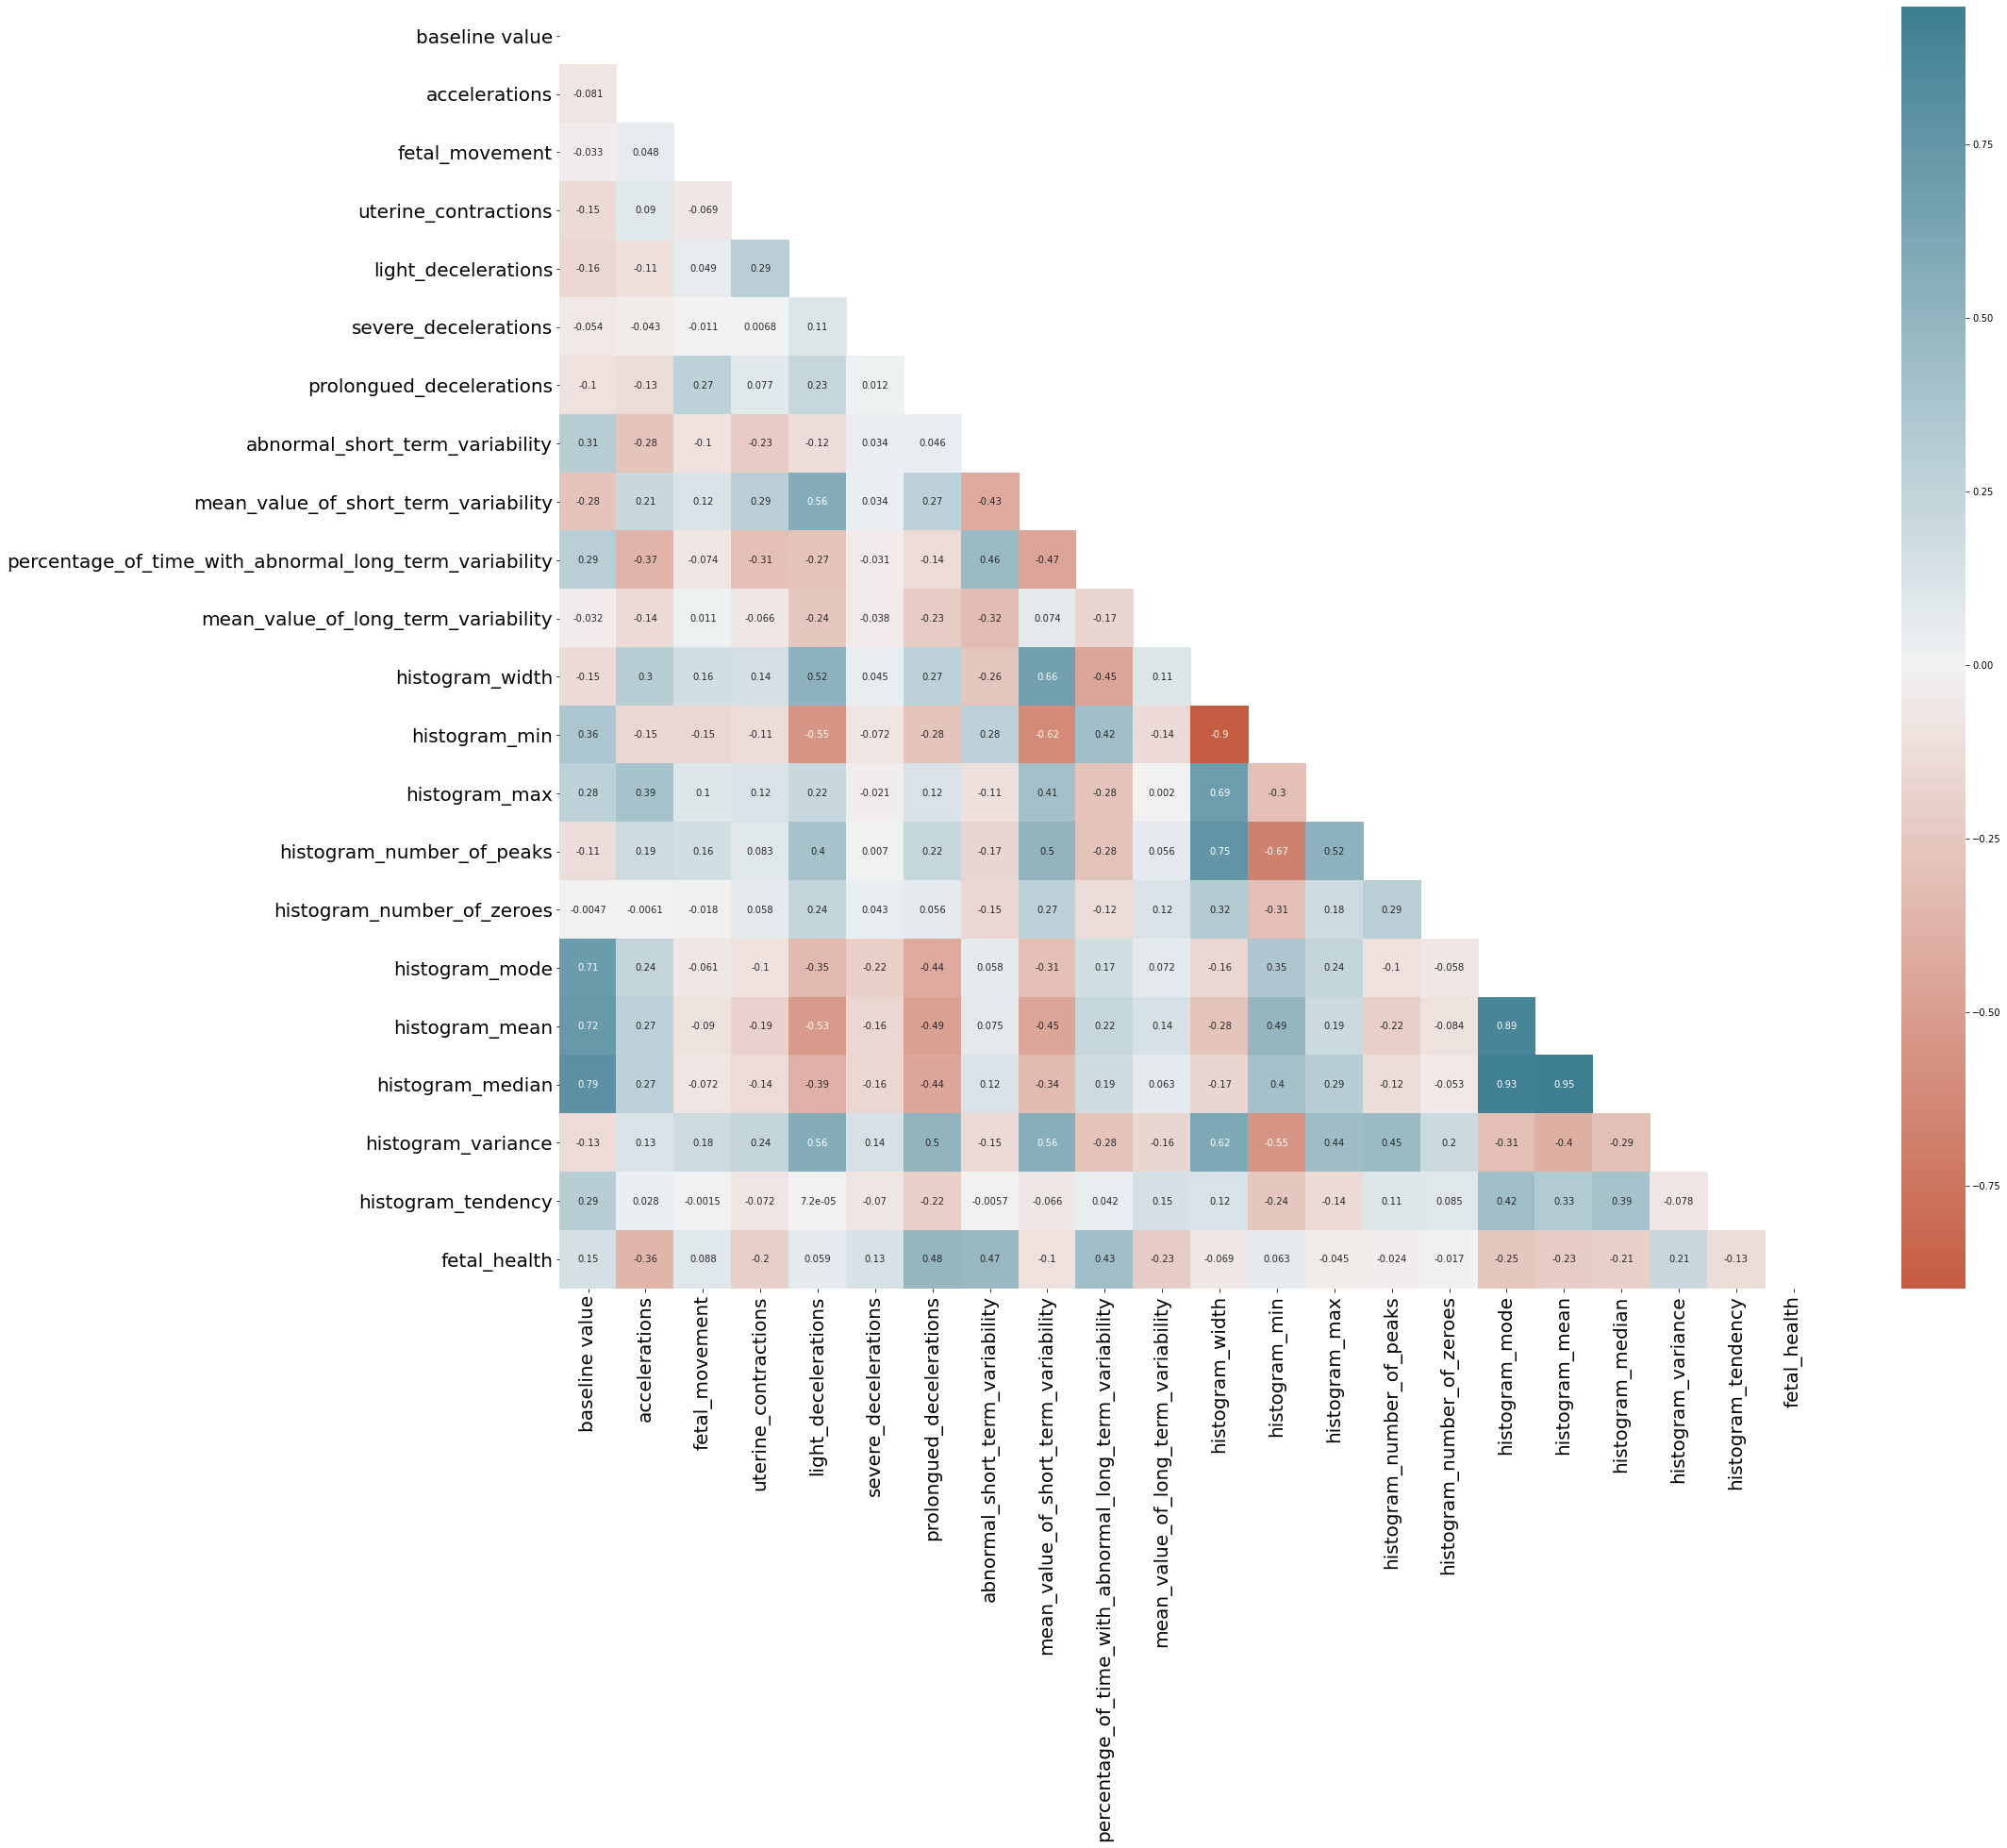

In [4]:
# Define figure sizes and axis label sizes/ticks
plt.figure(figsize = (30,25))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# Use a mask on the upper triangle for readability (triu - upper triangle vs tril - lower triangle)
mask = np.triu(np.ones_like(data.corr(method = 'kendall'), dtype=bool))
# Create heatmap
sns.heatmap(data.corr(),
            cmap=sns.diverging_palette(20, 220, n=200), 
            center = 0,
            mask = mask,
            annot= True)

**Note:** The correlation heatmap above was created to provide a starting point to see potential influencing features on our heart health target. It is limited, however in only capturing linear realtionships. Given our data types are not continuous, we have opted to employ Kendall's Tau to measure how our features relate to each other and to our target. The heatmap provides some insight into variables that are highly correlated that may need to be removed. It can be seen that histogram mean, median, and mode are highlly, positively correlated with Tau between them ranging from .89 to .95. There is also a high negative corrlation between the historgram min and histogram width at a Tau of -.90. Histogram width is negatively correlated to out target while min is positively correlated. A threshold will have to be chosen and a feature selected from correlated groups if removal is necessary. Histogram mode has the highest correlation to out target, fetal health compared to histogram mean and median. 

Insert Heat Map Commentary Here

# To Holly: The graphs below haven't been beautified yet, but I think most of the important technical details are there. I wanted to get drafts of each graph down so I didn't foget to include any. Next I plan to write some commentary under each graph about what we are looking at and what it means, as well as making them look better. The heatmap looks beautiful! I made a note above it.

In [4]:
# I named mine fetal_health so this is just an extra variable name
fetal_health = data

In [5]:
# Removing redundant features by finding ones that are highly correlated to eachother

# create correlation matrix
corr_matrix = fetal_health.corr()

# this function highlights high correlation values 
# re-run the kernel after opening it to see highlights
def high_corr(val):
    color = 'yellow' if (val > 0.9 or val < -0.9) else ''
    return 'background-color: {}'.format(color)

# apply highlighter to matrix
corr_matrix.style.applymap(high_corr)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


From this we can see that 'histogram_mode', 'histogram_mean', and 'histogram_median' are all highly correlated, so we will drop 'histogram_mode' and 'histogram_median'.  
  
*Note: On my Week 4 HW the teacher made a note that I should explain why I removed the two out of three highly correlated variables so I guess I should explain more here as well*

In [6]:
fetal_health.drop(['histogram_mode','histogram_median'], axis=1, inplace=True)

## Understanding the Features

#### Baseline Fetal Heart Rate

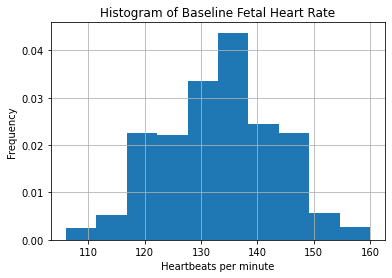

In [7]:
# "baseline value" histogram
fetal_health['baseline value'].hist(bins=10, density=True)
plt.title("Histogram of Baseline Fetal Heart Rate")
plt.xlabel("Heartbeats per minute")
plt.ylabel("Frequency")
plt.show()

In [8]:
fetal_health['baseline value'].describe()

count    2126.000000
mean      133.303857
std         9.840844
min       106.000000
25%       126.000000
50%       133.000000
75%       140.000000
max       160.000000
Name: baseline value, dtype: float64

The distribution of fetal heartbeat measurements is approximately normal, slightly leptokurtic, with a center around 133 beats per minute. It is a good candidate for an accurate point biserial correlation measure with the target feature. 

#### Accelerations of Fetal Heart Rate

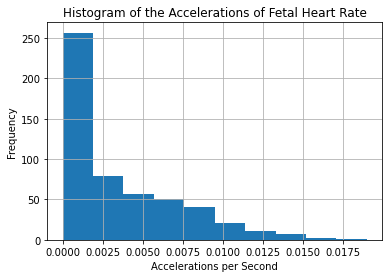

In [9]:
# "accelerations" histogram
fetal_health['accelerations'].hist(bins=10, density=True)
plt.title("Histogram of the Accelerations of Fetal Heart Rate")
plt.xlabel("Accelerations per Second")
plt.ylabel("Frequency")
plt.show()

This distribution is strongly skewed to the right, with the most common measurement being zero accelerations per second.

#### Number of Fetal Movements per Second

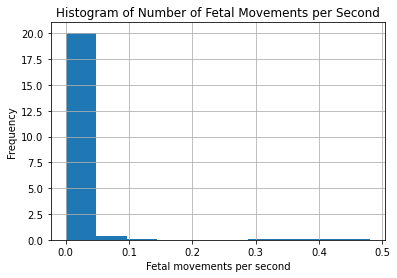

In [10]:
# "fetal_movement" histogram
fetal_health['fetal_movement'].hist(bins=10, density=True)
plt.title("Histogram of Number of Fetal Movements per Second")
plt.xlabel("Fetal movements per second")
plt.ylabel("Frequency")
plt.show()

This distibution has the vast majority of measurements resulting in zero fetal movements per second, and is also strongly skewed to the right. There does appear to be a few outliers between 0.3 and 0.5 fetal movements per second.

#### Number of Uterine Contractions per Second

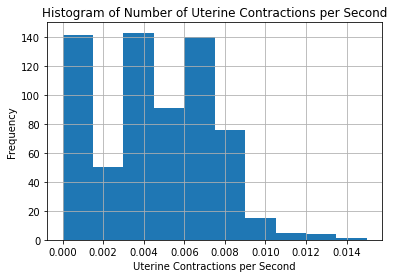

In [11]:
# "uterine_contractions" histogram
fetal_health['uterine_contractions'].hist(bins=10, density=True)
plt.title("Histogram of Number of Uterine Contractions per Second")
plt.xlabel("Uterine Contractions per Second")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

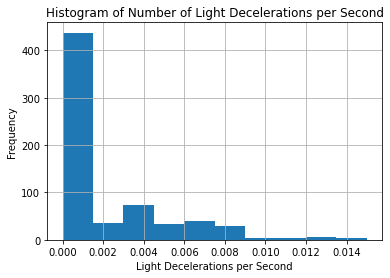

In [12]:
# "light_decelerations" histogram
fetal_health['light_decelerations'].hist(bins=10, density=True)
plt.title("Histogram of Number of Light Decelerations per Second")
plt.xlabel("Light Decelerations per Second")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

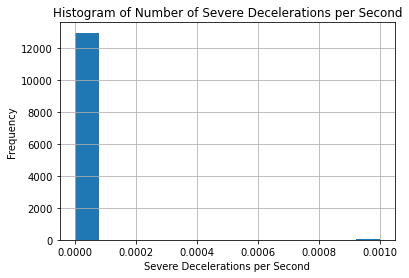

In [13]:
# "severe_decelerations" histogram
fetal_health['severe_decelerations'].hist(bins='auto', density=True)
plt.title("Histogram of Number of Severe Decelerations per Second")
plt.xlabel("Severe Decelerations per Second")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

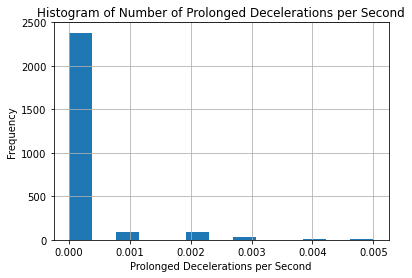

In [14]:
# "prolongued_decelerations" histogram
fetal_health['prolongued_decelerations'].hist(bins='auto', density=True)
plt.title("Histogram of Number of Prolonged Decelerations per Second")
plt.xlabel("Prolonged Decelerations per Second")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

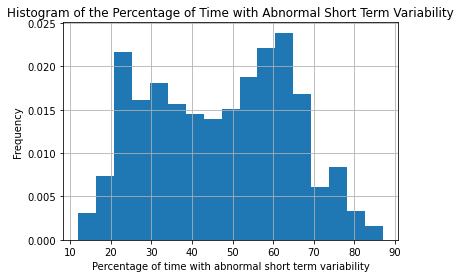

In [15]:
# "abnormal_short_term_variability" histogram
fetal_health['abnormal_short_term_variability'].hist(bins='auto', density=True)
plt.title("Histogram of the Percentage of Time with Abnormal Short Term Variability")
plt.xlabel("Percentage of time with abnormal short term variability")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

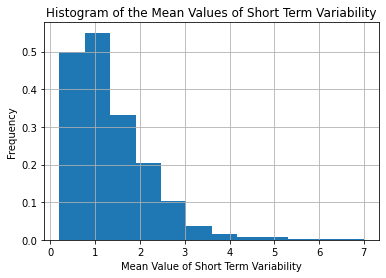

In [16]:
# "mean_value_of_short_term_variability" histogram
fetal_health['mean_value_of_short_term_variability'].hist(bins=12, density=True)
plt.title("Histogram of the Mean Values of Short Term Variability")
plt.xlabel("Mean Value of Short Term Variability")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

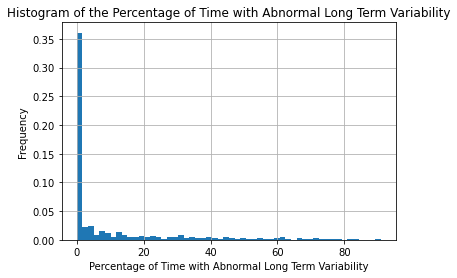

In [17]:
# "percentage_of_time_with_abnormal_long_term_variability" histogram
fetal_health['percentage_of_time_with_abnormal_long_term_variability'].hist(bins='auto', density=True)
plt.title("Histogram of the Percentage of Time with Abnormal Long Term Variability")
plt.xlabel("Percentage of Time with Abnormal Long Term Variability")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

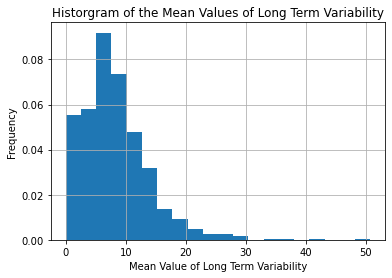

In [18]:
# "mean_value_of_long_term_variability" histogram
fetal_health['mean_value_of_long_term_variability'].hist(bins=20, density=True)
plt.title("Historgram of the Mean Values of Long Term Variability")
plt.xlabel("Mean Value of Long Term Variability")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

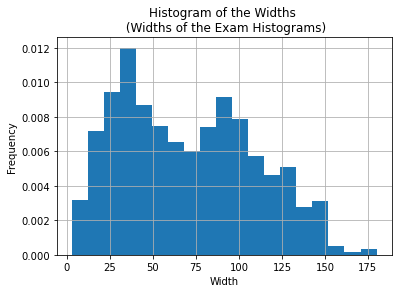

In [19]:
# "histogram_width" histogram
fetal_health['histogram_width'].hist(bins='auto', density=True)
plt.title("Histogram of the Widths \n (Widths of the Exam Histograms)")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

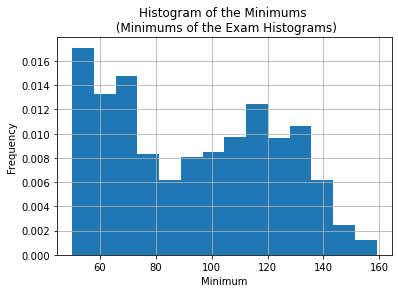

In [20]:
# "histogram_min" histogram
fetal_health['histogram_min'].hist(bins='auto', density=True)
plt.title("Histogram of the Minimums \n (Minimums of the Exam Histograms)")
plt.xlabel("Minimum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

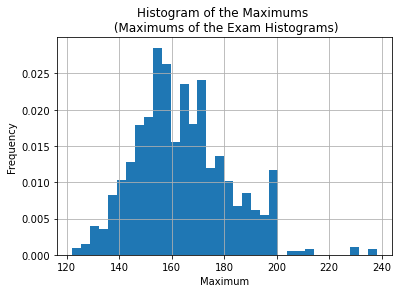

In [21]:
# "histogram_max" histogram
fetal_health['histogram_max'].hist(bins='auto', density=True)
plt.title("Histogram of the Maximums \n (Maximums of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

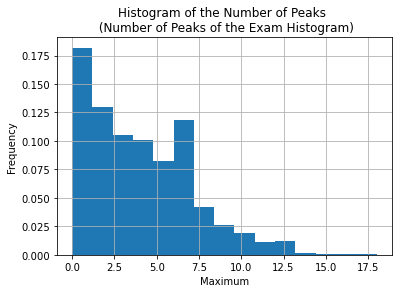

In [22]:
# "histogram_number_of_peaks" histogram
fetal_health['histogram_number_of_peaks'].hist(bins=15, density=True)
plt.title("Histogram of the Number of Peaks \n (Number of Peaks of the Exam Histogram)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

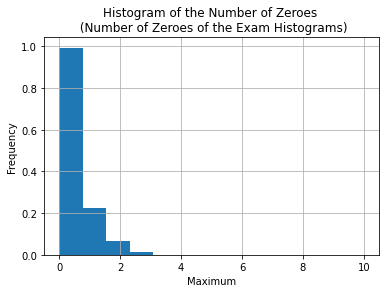

In [23]:
# "histogram_number_of_zeroes" histogram
fetal_health['histogram_number_of_zeroes'].hist(bins='auto', density=True)
plt.title("Histogram of the Number of Zeroes \n (Number of Zeroes of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

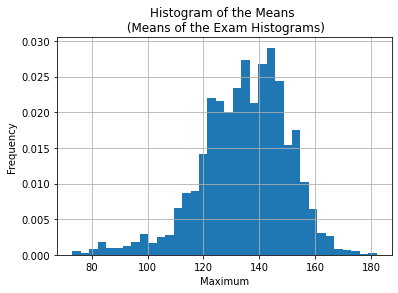

In [24]:
# "histogram_mean" histogram
fetal_health['histogram_mean'].hist(bins='auto', density=True)
plt.title("Histogram of the Means \n (Means of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

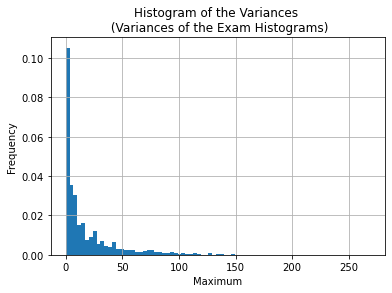

In [25]:
# "histogram_variance" histogram
fetal_health['histogram_variance'].hist(bins='auto', density=True)
plt.title("Histogram of the Variances \n (Variances of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

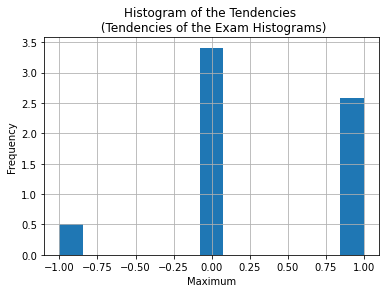

In [26]:
# "histogram_tendency" histogram
fetal_health['histogram_tendency'].hist(bins='auto', density=True)
plt.title("Histogram of the Tendencies \n (Tendencies of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

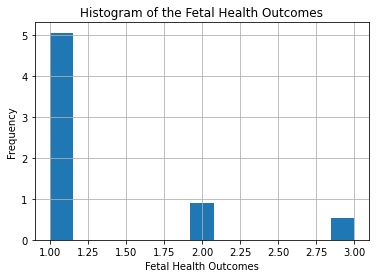

In [27]:
# "fetal_health" histogram
fetal_health['fetal_health'].hist(bins='auto', density=True)
plt.title("Histogram of the Fetal Health Outcomes")
plt.xlabel("Fetal Health Outcomes")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

## Understanding the Relationships Between Features

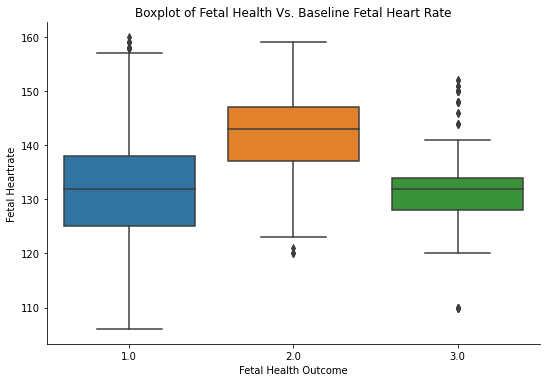

In [28]:
# boxplots of fetal health vs baseline value
sns.catplot(x="fetal_health", y="baseline value", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Baseline Fetal Heart Rate")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Fetal Heartrate")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

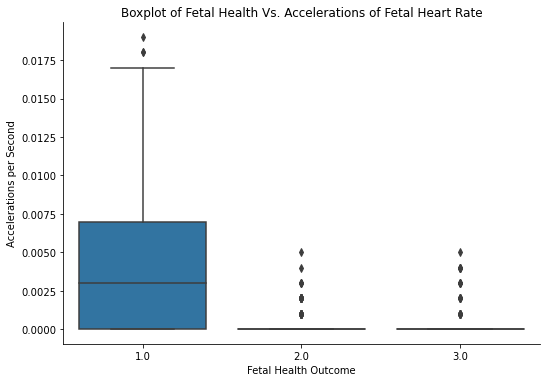

In [29]:
# boxplots of fetal health vs accelerations
sns.catplot(x="fetal_health", y="accelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Accelerations of Fetal Heart Rate")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Accelerations per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

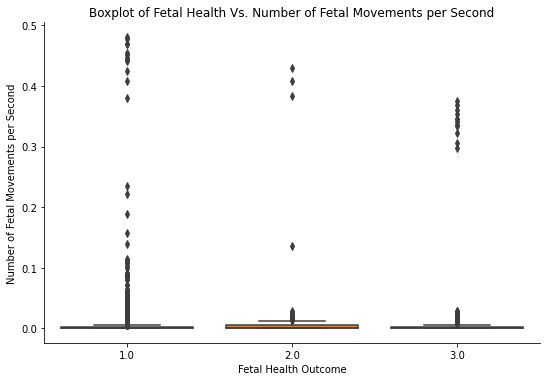

In [30]:
# boxplots of fetal health vs fetal_movement
sns.catplot(x="fetal_health", y="fetal_movement", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Fetal Movements per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Fetal Movements per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

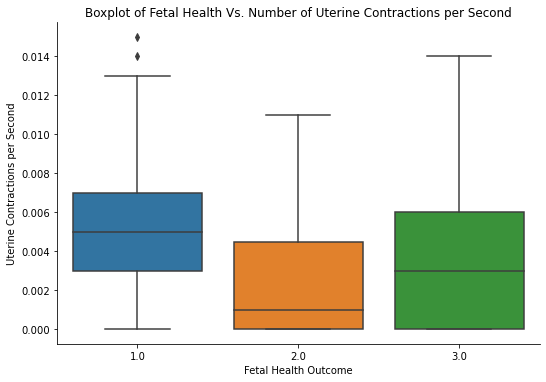

In [31]:
# boxplots of fetal health vs uterine_contractions
sns.catplot(x="fetal_health", y="uterine_contractions", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Uterine Contractions per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Uterine Contractions per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

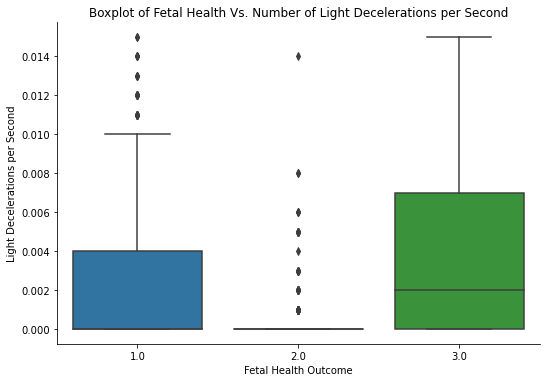

In [32]:
# boxplots of fetal health vs light_decelerations
sns.catplot(x="fetal_health", y="light_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Light Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Light Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

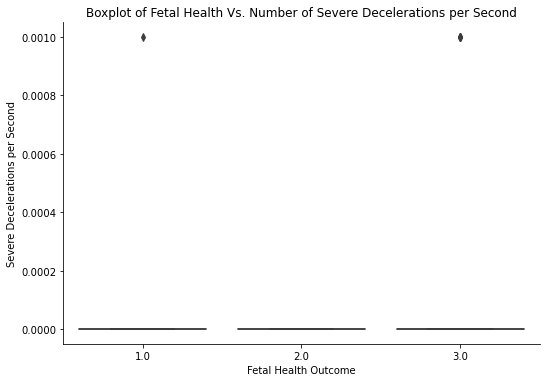

In [33]:
# boxplots of fetal health vs severe_decelerations
sns.catplot(x="fetal_health", y="severe_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Severe Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Severe Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

In [61]:
fetal_health['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [ ]:
CREATE BAR CHART/VAL COUNTS

In [65]:
severe_dec = fetal_health[fetal_health['severe_decelerations'] == 0.001]
severe_dec['fetal_health']

1488    1.0
1489    3.0
1791    3.0
1792    3.0
1793    3.0
1794    3.0
1795    3.0
Name: fetal_health, dtype: float64

Insert Graph Commentary Here

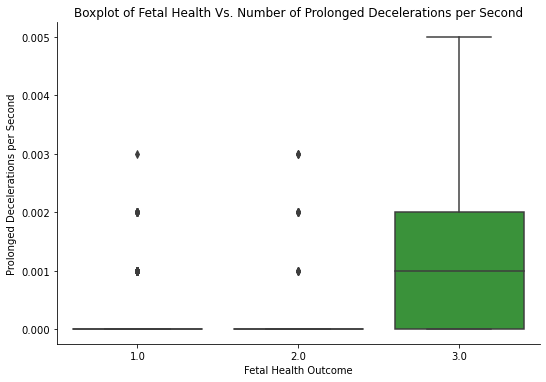

In [34]:
# boxplots of fetal health vs prolongued_decelerations
sns.catplot(x="fetal_health", y="prolongued_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Prolonged Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Prolonged Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

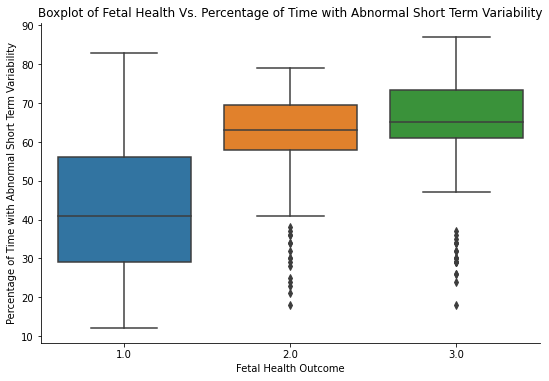

In [35]:
# boxplots of fetal health vs abnormal_short_term_variability
sns.catplot(x="fetal_health", y="abnormal_short_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Percentage of Time with Abnormal Short Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Percentage of Time with Abnormal Short Term Variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

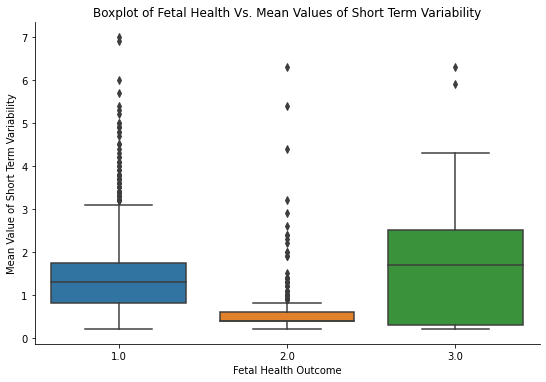

In [36]:
# boxplots of fetal health vs mean_value_of_short_term_variability
sns.catplot(x="fetal_health", y="mean_value_of_short_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean Values of Short Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Mean Value of Short Term Variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

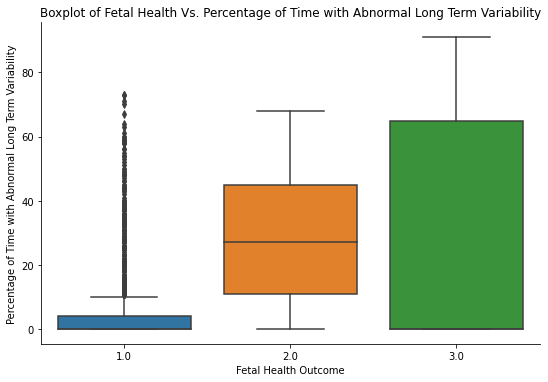

In [37]:
# boxplots of fetal health vs percentage_of_time_with_abnormal_long_term_variability
sns.catplot(x="fetal_health", y="percentage_of_time_with_abnormal_long_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Percentage of Time with Abnormal Long Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Percentage of Time with Abnormal Long Term Variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

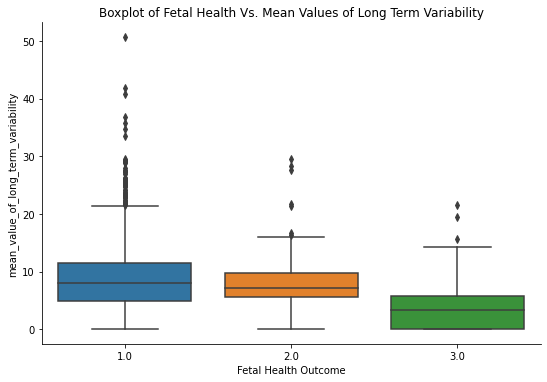

In [38]:
# boxplots of fetal health vs mean_value_of_long_term_variability
sns.catplot(x="fetal_health", y="mean_value_of_long_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean Values of Long Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("mean_value_of_long_term_variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

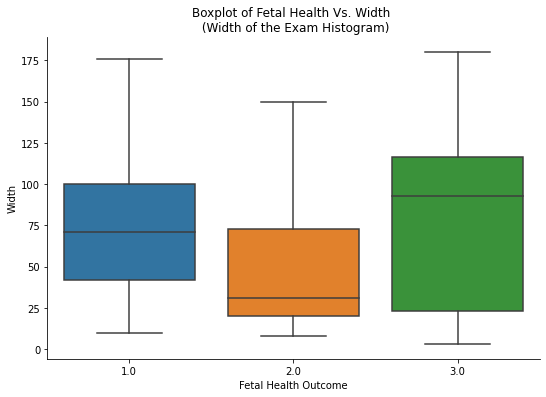

In [39]:
# boxplots of fetal health vs histogram_width
sns.catplot(x="fetal_health", y="histogram_width", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Width \n (Width of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Width")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

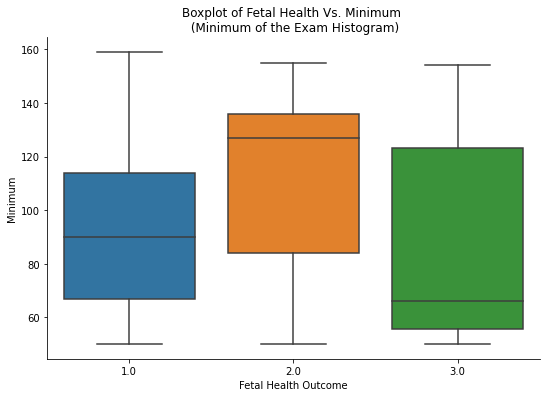

In [40]:
# boxplots of fetal health vs histogram_min
sns.catplot(x="fetal_health", y="histogram_min", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Minimum \n (Minimum of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Minimum")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

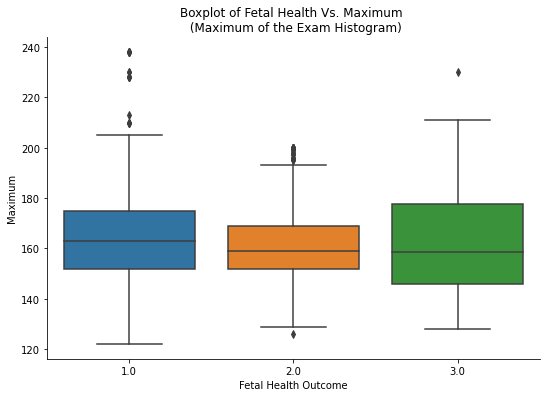

In [41]:
# boxplots of fetal health vs histogram_max
sns.catplot(x="fetal_health", y="histogram_max", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Maximum \n (Maximum of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Maximum")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

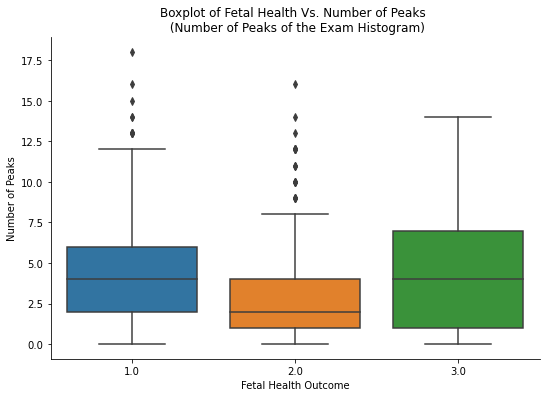

In [42]:
# boxplots of fetal health vs histogram_number_of_peaks
sns.catplot(x="fetal_health", y="histogram_number_of_peaks", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Peaks \n (Number of Peaks of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Peaks")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

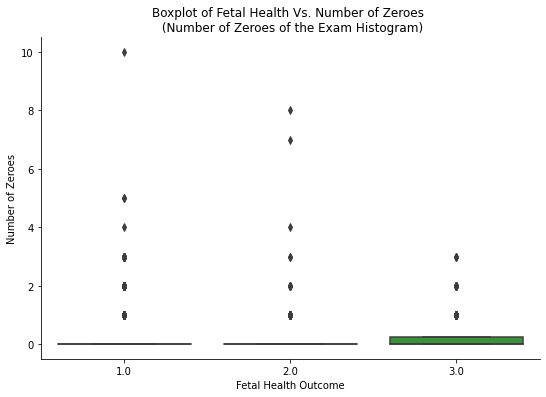

In [43]:
# boxplots of fetal health vs histogram_number_of_zeroes
sns.catplot(x="fetal_health", y="histogram_number_of_zeroes", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Zeroes \n (Number of Zeroes of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Zeroes")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

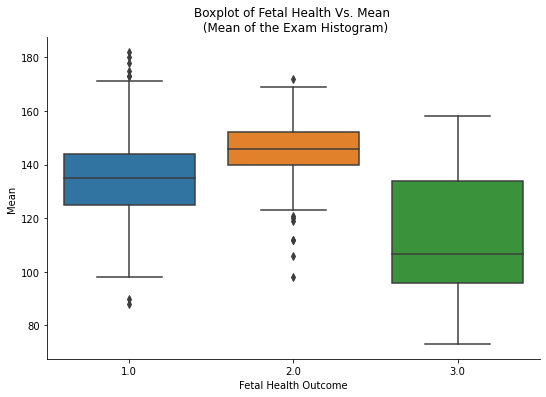

In [44]:
# boxplots of fetal health vs histogram_mean
sns.catplot(x="fetal_health", y="histogram_mean", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean \n (Mean of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Mean")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

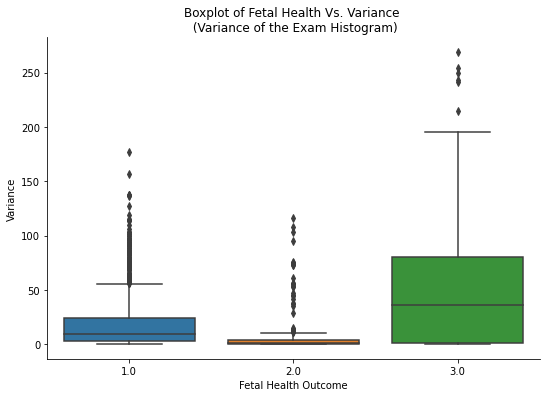

In [45]:
# boxplots of fetal health vs histogram_variance
sns.catplot(x="fetal_health", y="histogram_variance", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Variance \n (Variance of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Variance")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

#### Fetal Health Vs. Tendency

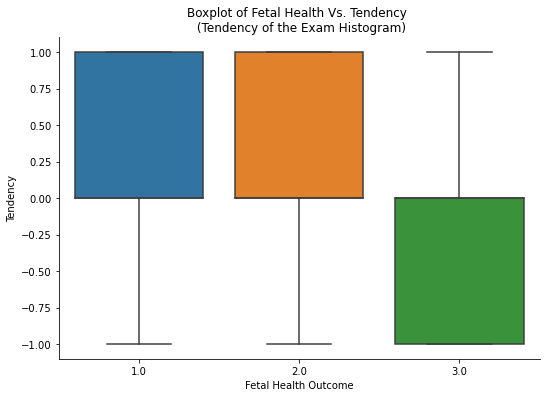

In [46]:
# boxplots of fetal health vs histogram_tendency
sns.catplot(x="fetal_health", y="histogram_tendency", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Tendency \n (Tendency of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Tendency")
plt.xticks(rotation=0)
plt.show()

In this boxplot we can see that there are no outliers in this data, and we can also see that there is a strong negative correlation between tendency and fetal health outcome.